In [115]:
from sympy import symbols
x = symbols('x')

```1/(1+25*x**2)```

In [117]:
def f(xi):
    return 1/(1+25*xi**2)
#     return float(expr.subs(x, xi))


In [172]:
xs = [-3, -2, -1, 0, 1, 2, 3]#list(map(int, input().split()))
ys = []
for xi in xs:
    print(xi, f(xi))
    ys.append(f(xi))

-3 0.004424778761061947
-2 0.009900990099009901
-1 0.038461538461538464
0 1.0
1 0.038461538461538464
2 0.009900990099009901
3 0.004424778761061947


In [181]:
# term L : input points, index
def term_L(xs, i):
    N = len(xs)
    L = 1
    for j in range(N):
        if i != j:
            L *= x-xs[j]
    return L

In [182]:
# Lagrange Polynomial
def lagrange(xs, ys):
    N = len(xs)
    p = 0
    for i in range(N):
        L = term_L(xs, i)
        p += ys[i]*L/float(L.subs(x,xs[i]))
    return p

In [174]:
pn = lagrange(xs, ys)
pn

6.14552605703048e-6*x*(x - 3)*(x - 2)*(x - 1)*(x + 1)*(x + 2) - 8.25082508250825e-5*x*(x - 3)*(x - 2)*(x - 1)*(x + 1)*(x + 3) + 0.000801282051282051*x*(x - 3)*(x - 2)*(x - 1)*(x + 2)*(x + 3) + 0.000801282051282051*x*(x - 3)*(x - 2)*(x + 1)*(x + 2)*(x + 3) - 8.25082508250825e-5*x*(x - 3)*(x - 1)*(x + 1)*(x + 2)*(x + 3) + 6.14552605703048e-6*x*(x - 2)*(x - 1)*(x + 1)*(x + 2)*(x + 3) - 0.0277777777777778*(x - 3)*(x - 2)*(x - 1)*(x + 1)*(x + 2)*(x + 3)

Text(0, 0.5, 'y')

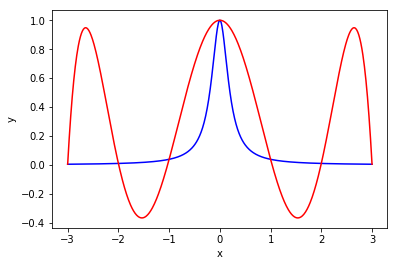

In [175]:
# plotting, Runge
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(-3, 3.01, 0.01)
ps = [float(pn.subs(x,tt)) for tt in t]
plt.plot(t,f(t), 'b')
plt.plot(t, ps, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [176]:
# f[x1, x2, ... , xn] divided differences
def div_diff(f, xs):
    if len(xs) == 1:
        return f(xs[0])
    else:
        return (div_diff(f, xs[1:])-div_diff(f, xs[:-1]))/(xs[-1]-xs[0])
l = [-5, -5/3, 5/3, 5]
# f = lambda x:1/(1+2*x**2)
for i in range(1, len(l)+1):
    print(div_diff(f, l[:i]))

0.001597444089456869
0.003779441852027292
-0.0005669162778040938
0.0


In [177]:
# Newton Interpolation
def newton(xs, ys):
    if len(xs) == 1:
        print(xs)
        return div_diff(f, xs)
    else:
        term = term_L(xs, len(xs)-1)
        term *= div_diff(f, xs)
        print(xs)
        return newton(xs[:-1], ys[:-1]) + term

In [178]:
f(xs[0])
div_diff(f, xs[:1])
div_diff(f, [-3])

0.004424778761061947

In [179]:
pn = newton(xs, ys)
pn

[-3, -2, -1, 0, 1, 2, 3]
[-3, -2, -1, 0, 1, 2]
[-3, -2, -1, 0, 1]
[-3, -2, -1, 0]
[-3, -2, -1]
[-3, -2]
[-3]


-0.0263279391247498*x*(x - 2)*(x - 1)*(x + 1)*(x + 2)*(x + 3) + 0.0789838173742493*x*(x - 1)*(x + 1)*(x + 2)*(x + 3) - 0.156914517183509*x*(x + 1)*(x + 2)*(x + 3) + 0.00547621133794795*x + 0.151648929358559*(x + 1)*(x + 2)*(x + 3) + 0.0115421685122903*(x + 2)*(x + 3) + 0.0208534127749058

Text(0, 0.5, 'y')

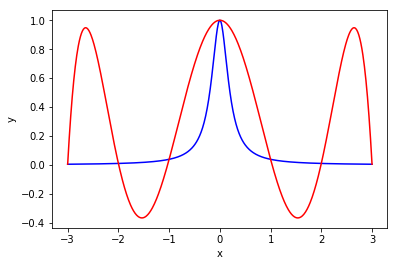

In [180]:
# plotting, Runge
t = np.arange(-3, 3.01, 0.01)
ps = [float(pn.subs(x,tt)) for tt in t]
plt.plot(t,f(t), 'b')
plt.plot(t, ps, 'r')
plt.xlabel('x')
plt.ylabel('y')

In [218]:
# Hermite Interpolation
def q(xs, i):
    return term_L(xs,i)**2
def h(xs, i):
    return q(xs,i)/q(xs,i).subs(x,xs[i])*(1 - (x-xs[i])*q(xs,i).diff(x).subs(x,xs[i])/q(xs,i).subs(x,xs[i]))
def g(xs, i):
    return q(xs,i)/q(xs,i).subs(x,xs[i])*(x-xs[i])
l = [0,1,2]
lv = [0,1,0]
lp = [1,0,-1]

In [213]:
q(l,2).diff(x).subs(x,2)

12

In [215]:
h(l,1)

x**2*(x - 2)**2

In [216]:
h(l,2)

x**2*(7 - 3*x)*(x - 1)**2/4

In [198]:
h(l,2)

x**2*(7 - 3*x)*(x - 1)**2/4

In [199]:
g(l,0)

x*(x - 2)**2*(x - 1)**2/4

In [200]:
g(l,1)

x**2*(x - 2)**2*(x - 1)

In [201]:
g(l,2)

x**2*(x - 2)*(x - 1)**2/4

In [220]:
p = 0
for i in range(3):
    p += h(l,i)*lv[i] + g(l,i)*lp[i]
p

x**2*(x - 2)**2 - x**2*(x - 2)*(x - 1)**2/4 + x*(x - 2)**2*(x - 1)**2/4